In [1]:
!pip install pycaret[full]
!pip install dagshub

  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl.metadata (20 kB)
Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
Using cached httpx-0.27.2-py3-none-any.whl (76 kB)
Using cached httpcore-1.0.5-py3-none-any.whl (77 kB)
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.16.3
    Uninstalling httpcore-0.16.3:
      Successfully uninstalled httpcore-0.16.3
  Attempting uninstall: dacite
    Found existing installation: dacite 1.6.0
    Uninstalling dacite-1.6.0:
      Successfully uninstalled dacite-1.6.0
  Attempting uninstall: httpx
    Found existing installation: httpx 0.23.3
    Uninstalling httpx-0.23.3:
      Successfully uninstalled httpx-0.23.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dagshub 0.3.35 

In [2]:
import pandas as pd
import pycaret
from pycaret.classification import *

In [3]:
data= pd.read_csv("/content/customer_churn_data.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
s=setup(
      data, target = 'Churn', session_id = 123,
      ignore_features = ['customerID'],
      log_experiment = True,
      experiment_name = 'customer_churn',
      )

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Numeric features,3


In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7789,0.8060,0.7789,0.7727,0.7741,0.4110,0.4139,0.3230
knn,K Neighbors Classifier,0.7716,0.7792,0.7716,0.7642,0.7667,0.3912,0.3932,0.3680
qda,Quadratic Discriminant Analysis,0.7692,0.8001,0.7692,0.7512,0.7338,0.2800,0.3165,0.3780
lr,Logistic Regression,0.7552,0.8295,0.7552,0.7411,0.6894,0.1576,0.2294,2.0270
rf,Random Forest Classifier,0.7501,0.7778,0.7501,0.7130,0.6983,0.1819,0.2174,0.9440
svm,SVM - Linear Kernel,0.7462,0.7937,0.7462,0.7132,0.6917,0.2081,0.2471,0.5090
ridge,Ridge Classifier,0.7385,0.7839,0.7385,0.6907,0.6592,0.0793,0.1278,0.3200
lda,Linear Discriminant Analysis,0.7385,0.7338,0.7385,0.6907,0.6592,0.0793,0.1278,0.3620
et,Extra Trees Classifier,0.7379,0.7473,0.7379,0.6890,0.6710,0.1069,0.1467,0.9820
catboost,CatBoost Classifier,0.7369,0.7369,0.7369,0.6849,0.6582,0.0760,0.1205,5.7390


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

2024/09/13 01:59:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/13 01:59:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/13 01:59:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/13 01:59:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/13 01:59:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/13 01:59:22 

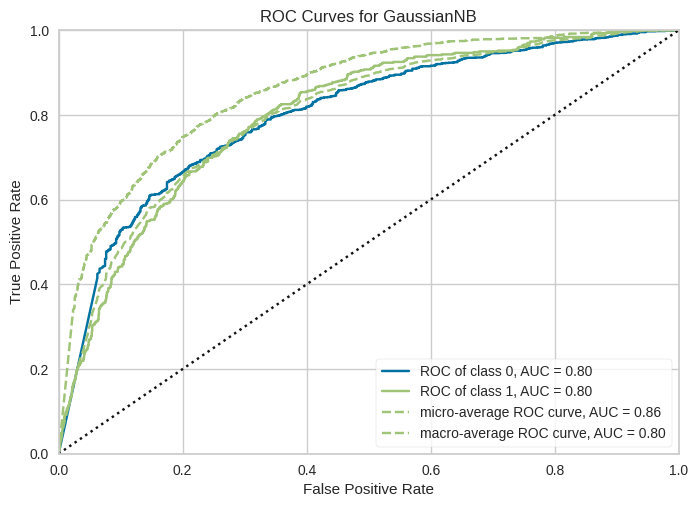

In [7]:
plot_model(best, plot = 'auc')

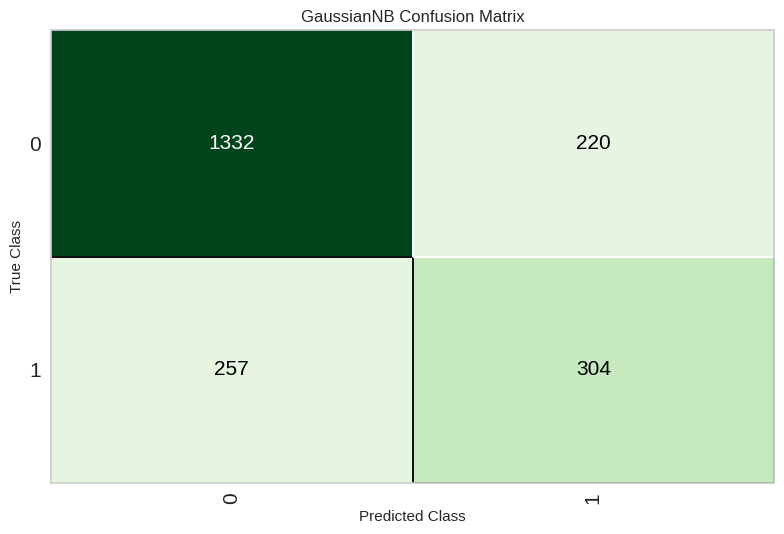

In [9]:
plot_model(best, plot = 'confusion_matrix')

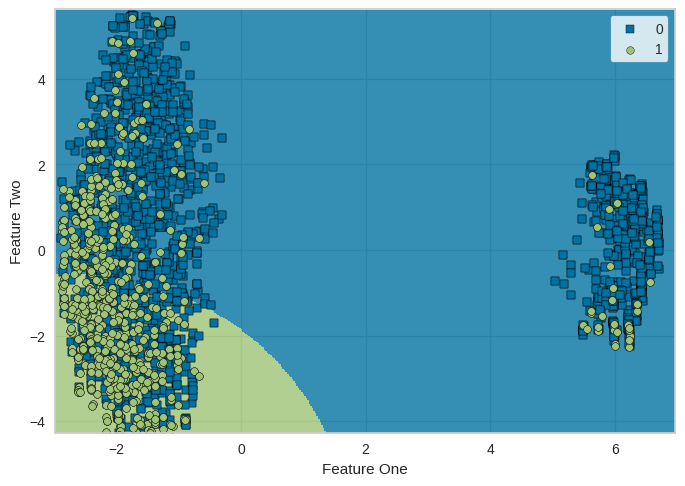

In [13]:
plot_model(best, plot = 'boundary')

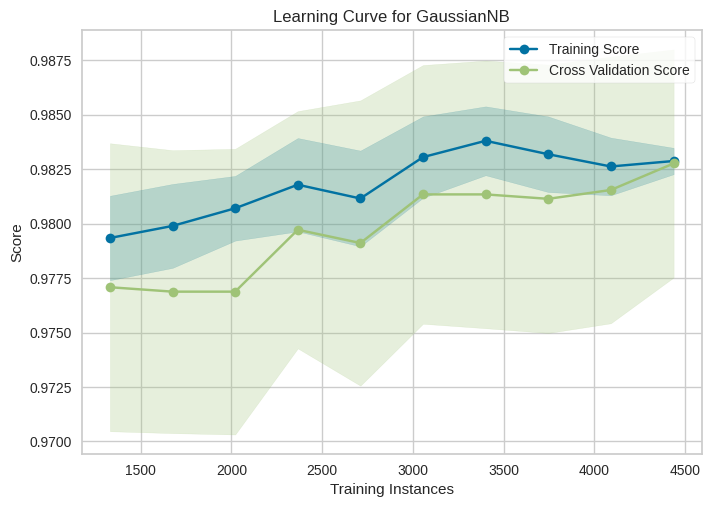

In [16]:
plot_model(best, plot = 'learning')

In [20]:
save_model(best, './outputs/model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False...
                                                               verbose=0))),
                 ('rest_encoding',
                  TransformerWrapper(exclude=None, include=['TotalCharges'],
                       